In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import pickle
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


**Loading the dataset**

In [8]:
df = pd.read_csv('Warangal.csv')
df.drop_duplicates(subset=None, inplace=True)
df.tail()

,district,date,temp
1301,Warangal,27-12-2019,27.60
1302,Warangal,28-12-2019,28.40
1303,Warangal,29-12-2019,27.65
1304,Warangal,30-12-2019,27.75
1305,Warangal,31-12-2019,29.20


In [9]:
df.date.unique()
df.sort_values('date')

,district,date,temp
947,Warangal,01-01-2019,26.40
608,Warangal,01-01-2020,27.00
273,Warangal,01-01-2021,30.30
0,Warangal,01-01-2022,29.20
948,Warangal,01-02-2019,30.30
...,...,...,...
885,Warangal,31-10-2020,33.50
546,Warangal,31-10-2021,33.90
1305,Warangal,31-12-2019,29.20
946,Warangal,31-12-2020,29.90


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1305
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1306 non-null   object 
 1   date      1306 non-null   object 
 2   temp      1306 non-null   float64
dtypes: float64(1), object(2)
memory usage: 40.8+ KB


In [11]:
df.dtypes

district     object
date         object
temp        float64
dtype: object

In [12]:
df ['date'] = pd.to_datetime(df ['date'])

df.tail()


,district,date,temp
1301,Warangal,2019-12-27,27.60
1302,Warangal,2019-12-28,28.40
1303,Warangal,2019-12-29,27.65
1304,Warangal,2019-12-30,27.75
1305,Warangal,2019-12-31,29.20


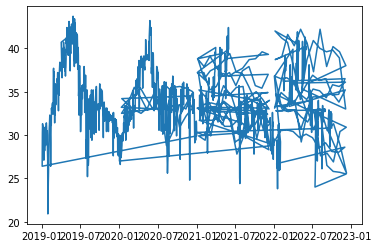

In [14]:
plt.plot(df ['date'], df ['temp'])
plt.show()

In [15]:
new_column = df[['date', 'temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
1301,2019-12-27,27.60
1302,2019-12-28,28.40
1303,2019-12-29,27.65
1304,2019-12-30,27.75
1305,2019-12-31,29.20


**Training the forecasting model**

In [16]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.397% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.397% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**Forecasting the temperature into the future**

In [29]:
future = n.make_future_dataframe(new_column, periods=390)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 75.727% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 75.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.744% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.744% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-10,None,31.42,33.59,-2.20,0.03
1,2022-12-11,None,31.45,33.59,-2.25,0.10
2,2022-12-12,None,31.20,33.59,-2.30,-0.10
3,2022-12-13,None,31.34,33.59,-2.35,0.09
4,2022-12-14,None,31.21,33.59,-2.39,0.01


**visualize these predictions**

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


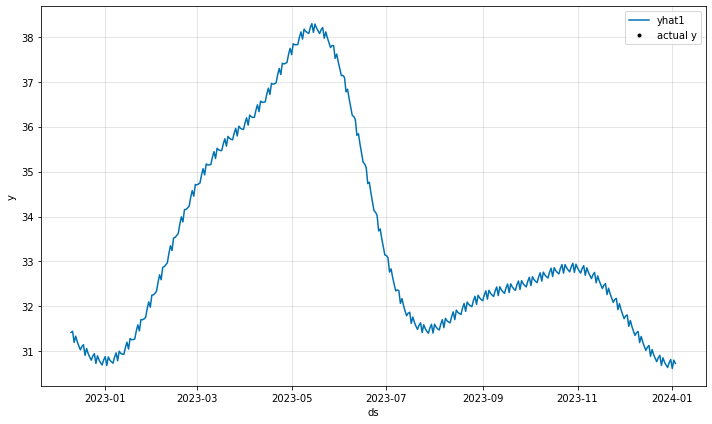

In [30]:
plot = n.plot(forecast)

In [31]:
Warangal_forecast = forecast[['ds', 'yhat1']]
Warangal_forecast = Warangal_forecast[22:]
print(Warangal_forecast.head(4))

           ds  yhat1
22 2023-01-01  30.88
23 2023-01-02  30.68
24 2023-01-03  30.87
25 2023-01-04  30.80


**Daily_Data_prediction**

In [32]:
data= Warangal_forecast[['ds', 'yhat1']] 
data.dropna(inplace=True)
data.columns = ['date', 'Temp'] 
data.tail()

,date,Temp
385,2023-12-30,30.75
386,2023-12-31,30.82
387,2024-01-01,30.62
388,2024-01-02,30.80
389,2024-01-03,30.73


In [34]:
data.to_csv('Warangal2023.csv')